# Hierarchy tests

In [1]:
from myhdl import *

from frequently_used import up_counter


@block
def test(clk, a, b):
    
    v = Signal(intbv()[16:])
    r = ResetSignal(0, 1, False)
    
    inst_counter = up_counter(clk, 1, r, v)
    
    @always_comb
    def xor_assign():
        b.next = a ^ 0xaa

    return instances()

CREATE Module: 'up_counter_0'
Adding module with name: up_counter_1_c1_1_16
CONVERT_RTL tree >>>>>> 'TEST_UP_COUNTER_0_WORKER' 
TRUNC: /home/pyosys/src/myhdl/myhdl-local/example/ipynb/work/myhdl-synthesis/examples/frequently_used.py:17 Implicit carry truncate: v[16:], src[17:]
DONE instancing submodules
CREATE Module: 'test'
Adding module with name: test_1_8_8
CONVERT_RTL tree >>>>>> 'TEST_XOR_ASSIGN' 
++++++++ up_counter_0: up_counter_1_c1_1_16 (Module) ++++++++
DONE instancing submodules
Generating RTL image...
Display...


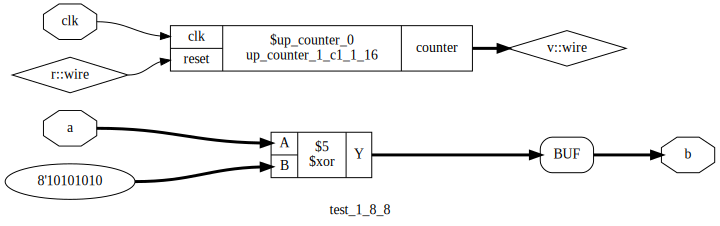

In [2]:
from myhdl.conversion import yshelper

clk = Signal(bool())
v, q = [ Signal(intbv()[8:]) for i in range(2) ]

design = yshelper.Design("test")
inst = test(clk, v, q)
inst.convert("yosys_module", design, name="test", trace=True)
design.write_ilang()

from ys_aux import to_svg
display(to_svg(design))

In [3]:
! ls top_mapped.il

top_mapped.il


In [4]:
! yosys -q -p "read_ilang top_mapped.il; hierarchy -check; check"